1)_

  

> ii. Usando 3 subplots, graficar en Python

*   Las soluciones exactas y aproximadas 
*   El error global
*   El error local


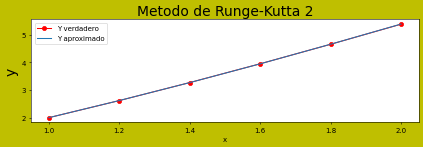

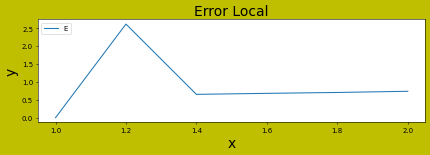

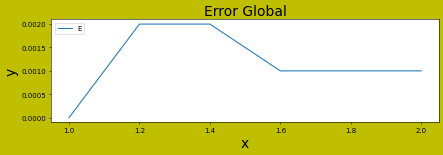

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#Ejercicio a)

y_real=[2,2.61878587,3.27106113,3.95200581,4.658016,5.38629436]
y_aproximado=[2,2.62,3.27,3.95,4.66,5.39]

error_local = [0,2.62, 0.653, 0.681,0.706,0.739]
error_global = [0,0.002, 0.002, 0.001, 0.001, 0.001]


#===================================Grafico los valores aproximados
plt.figure(1, (10,6), 50, 'y', 'g')
x = np.linspace(1,2,6)

plt.subplot(2,1,1)
#plt.plot(x,y_real, x,y_aproximado)
plt.plot(x,y_real, marker="o", color="red")
plt.plot(x,y_aproximado)

plt.title("Metodo de Runge-Kutta 2", fontsize=20)
plt.legend(('Y verdadero','Y aproximado'), loc='upper left')
plt.xlabel('x')
plt.ylabel('y', fontsize=20)


#===================================Grafico los errores
plt.figure(2, (10,6), 50, 'y', 'g')

plt.subplot(2,1,2)
plt.plot(x,error_local)

plt.title("Error Local", fontsize=20)
plt.legend('Error Local', loc='upper left')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

plt.figure(3, (10,6), 50, 'y', 'g')
plt.subplot(2,1,2)
plt.plot(x,error_global)


plt.title("Error Global", fontsize=20)
plt.legend('Error Global', loc='upper left')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)


plt.show()




> Conclusiones:



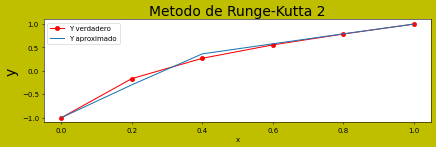

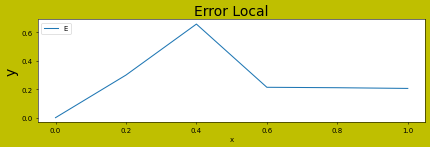

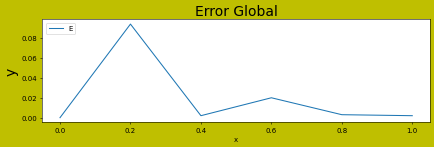

In [5]:
import numpy as np
import matplotlib.pyplot as plt


#Ejercicio b)

y_real=[-1,-0.167874,0.26466472,0.55021293,0.78168436,0.99326205]
y_aproximado=[-1,-0.3,0.359,0.573,0.785,0.992]

error_local = [0,0.300, 0.659, 0.214,0.211,0.206]
error_global = [0,0.094, 0.002, 0.02, 0.003, 0.002]
x = np.linspace(0,1,6)

#===================================Grafico los valores aproximados
plt.figure(1, (10,6), 50, 'y', 'g')

plt.subplot(2,1,1)
#plt.plot(x,y_real, x,y_aproximado)
plt.plot(x,y_real, marker="o", color="red")
plt.plot(x,y_aproximado)

plt.title("Metodo de Runge-Kutta 2", fontsize=20)
plt.legend(('Y verdadero','Y aproximado'), loc='upper left')
plt.xlabel('x')
plt.ylabel('y', fontsize=20)


#===================================Grafico los errores
plt.figure(2, (10,6), 50, 'y', 'g')

plt.subplot(2,1,2)
plt.plot(x,error_local)

plt.title("Error Local", fontsize=20)
plt.legend(('Error Local'), loc='upper left')
plt.xlabel('x')
plt.ylabel('y', fontsize=20)

plt.figure(3, (10,6), 50, 'y', 'g')
plt.subplot(2,1,2)
plt.plot(x,error_global)

plt.title("Error Global", fontsize=20)
plt.legend(('Error Global'), loc='upper left')
plt.xlabel('x')
plt.ylabel('y', fontsize=20)


plt.show()

> Conclusiones:


*   Puedo decir que el metodo es consistente ya que se puede observar que el error local tiene una tendecia a bajar, y tampoco se dispara.

*   Puedo decir que el metodo converge ya que al observar los errores globales obtenidos, se ve que estos van dismunuyendo en cada iteracion y no se dispara.





----------------------------------------------------






> iii. Implementar todos los métodos del apartado i) en Python. Evalué ambos PVI con valores de h de 10-2, 10-3 y 10-4.

In [ ]:
#METODO DE RUNGE-KUTTA 2: Utilizo el metodo de Euler Modificado (IMPLICITO)
import numpy as np
import matplotlib.pyplot as plt

#Solucion exacta de la funcion a)
def y_solucion(t):
  return t*np.log(t) +2*t

def y_prima(t,y):
  return 1+(y/t)

def RungeKutta2(t0, y0,h,maximo,f_sol,f_p):
	t_anterior=t0
	y_anterior=y0
	t_posterior = t_anterior + h

	for i in range(maximo):
		k1=f_p(t_anterior, y_anterior)
		k2=f_p(t_posterior, y_anterior + h * k1)
		y_posterior= y_anterior + 0.5 * h *(k1+k2)

		#Calculo los errores
		error_local = np.abs(y_posterior-y_anterior)
		error_global = np.abs(y_posterior-f_sol(t_posterior))
		print(f"{i+1}: [t: {t_posterior}, y: {y_posterior}] , [EL: {error_local}, EG: {error_global}]")

		#Para la proxima iteraccion
		t_anterior=t_posterior
		y_anterior=y_posterior
		t_posterior = t_anterior + h
		#pass
	
#Intervalos
a=1
b=2
h=10**(-2)
#h=10**(-3)
#h=10**(-4)
#Valores iniciales
t0=a
y0=y_solucion(t0)
maximo=int((b-a)/h) #Numero de iteracciones

print(f"0: [t: {t0}, y: {y0}] ")
RungeKutta2(t0,y0,h,maximo,y_solucion,y_prima)

0: [t: 1, y: 2.0] 
1: [t: 1.01, y: 2.030049504950495] , [EL: 0.030049504950495187, EG: 3.2921120451945285e-07]
2: [t: 1.02, y: 2.0601980246073532] , [EL: 0.030148519656858053, EG: 6.552347500132782e-07]
3: [t: 1.03, y: 2.090444588145765] , [EL: 0.03024656353841193, EG: 9.781630256888718e-07]
4: [t: 1.04, y: 2.120788243594529] , [EL: 0.03034365544876394, EG: 1.2980848835830727e-06]
5: [t: 1.05, y: 2.1512280572920957] , [EL: 0.030439813697566542, EG: 1.6150858082042419e-06]
6: [t: 1.06, y: 2.181763113363341] , [EL: 0.030535056071245403, EG: 1.929248073295753e-06]
7: [t: 1.07, y: 2.21239251321609] , [EL: 0.03062939985274893, EG: 2.240650891938145e-06]
8: [t: 1.08, y: 2.243115375056462] , [EL: 0.030722861840371873, EG: 2.549370556881314e-06]
9: [t: 1.09, y: 2.273930833422173] , [EL: 0.0308154583657112, EG: 2.8554805742153633e-06]
10: [t: 1.1, y: 2.3048380387329686] , [EL: 0.030907205310795494, EG: 3.159051789047851e-06]
11: [t: 1.11, y: 2.3358361568574044] , [EL: 0.03099811812443587, EG: 3

In [ ]:
#METODO DE RUNGE-KUTTA 4:

import numpy as np
import matplotlib.pyplot as plt

#Solucion exacta de la funcion a)
def y_solucion(t):
  return t*np.log(t) +2*t

def y_prima(t,y):
  return 1+(y/t)
  
def RungeKutta4(t0, y0,h,maximo,f_sol,f_p):
	t_anterior=t0
	y_anterior=y0
	t_posterior = t_anterior + h

	for i in range(maximo):
		k1=f_p(t_anterior, y_anterior)
		k2=f_p(t_anterior+h/2, y_anterior + k1/2)
		k3=f_p(t_anterior+h/2, y_anterior + k2/2)
		k4=f_p(t_anterior+h, y_anterior + h*k3)
		y_posterior= y_anterior + (1/6)* (k1 + 2*k2 + 2*k3+ k4)

		#Calculo los errores
		error_local = np.abs(y_posterior-y_anterior)
		error_global = np.abs(y_posterior-f_sol(t_posterior))
		print(f"{i+1}: [t: {t_posterior}, y: {y_posterior}] , [EL: {error_local}, EG: {error_global}]")

		#Para la proxima iteraccion
		t_anterior=t_posterior
		y_anterior=y_posterior
		t_posterior = t_anterior + h
		#pass

#Intervalos
a=1
b=2
h=10**(-2)
#h=10**(-3)
#h=10**(-4)
#Valores iniciales
t0=a
y0=y_solucion(t0)
maximo=int((b-a)/h) #Numero de iteracciones

print(f"0: [t: {t0}, y: {y0}] ")
RungeKutta4(t0,y0,h,maximo,y_solucion,y_prima)

0: [t: 1, y: 2.0] 
1: [t: 1.01, y: 6.239573727180397] , [EL: 4.239573727180397, EG: 4.209523893018697]
2: [t: 1.02, y: 16.3401084138787] , [EL: 10.100534686698303, EG: 14.279909734036597]
3: [t: 1.03, y: 40.201270587675744] , [EL: 23.861162173797045, EG: 38.11082502136695]
4: [t: 1.04, y: 96.12897231180875] , [EL: 55.92770172413301, EG: 94.00818277012934]
5: [t: 1.05, y: 226.2333904373191] , [EL: 130.10441812551034, EG: 224.0821607649412]
6: [t: 1.06, y: 526.6871538111761] , [EL: 300.45376337385704, EG: 524.5053887685647]
7: [t: 1.07, y: 1215.5818114779747] , [EL: 688.8946576667986, EG: 1213.3694167241079]
8: [t: 1.08, y: 2784.0535273038904] , [EL: 1568.4717158259157, EG: 2781.810409379463]
9: [t: 1.09, y: 6330.5823284056005] , [EL: 3546.52880110171, EG: 6328.308394716698]
10: [t: 1.1, y: 14295.560998777362] , [EL: 7964.978670371762, EG: 14293.256157579577]
11: [t: 1.11, y: 32064.830129307345] , [EL: 17769.26913052998, EG: 32062.494289690334]
12: [t: 1.12, y: 71447.6069901699] , [EL: 3



> Conclusiones:


*   **RUNGE-KUTTA 2:** 
  *   **h=10^(-2):**
      *   Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado.

      *   No converge ya que en el error global se observa una inestabilidad, es decir se dispara , luego dismonuye y vuelve a aumentar de una gran manera hasta cierto punto, donde a partir de alli va disminuyendo.

  *   **h=10^(-3):**
      *  Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado. 

      *   No converge ya que en el error global se observa una inestabilidad, es decir se dispara , luego dismonuye y vuelve a aumentar de una gran manera hasta cierto punto, donde a partir de alli va disminuyendo.

  *   **h=10^(-4):**
      *  Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado. 

      *   No converge ya que en el error global se observa una inestabilidad, es decir se dispara , luego dismonuye y vuelve a aumentar de una gran manera hasta cierto punto, donde a partir de alli va disminuyendo.



*   **RUNGE-KUTTA 4:**
  *   **h=10^(-2):**
      *   No es consistente ya que el error local se dispara de gran manera.

      *   No converge ya que en el error global se observa una inestabilidad, es decir se dispara , luego dismonuye y vuelve a aumentar de una gran manera hasta cierto punto, donde a partir de alli va disminuyendo.  

  *   **h=10^(-3):**
      *   No es consistente ya que el error local se dispara de gran manera.

      *   No converge ya que en el error global se dispara de gran manera.
      
  *   **h=10^(-4):**
      *   No es consistente ya que el error local se dispara de gran manera.

      *   No converge ya que en el error global se dispara de gran manera. 
  







In [ ]:
#Solucion exacta de la funcion b)
def y_solucion(t):
  return t-np.exp(-5*t)

def y_prima(t,y):
  return 5*np.exp(5*t)*(y-t)**(2)+1


#Intervalos
a=0
b=1
h=10**(-2)
#h=10**(-3)
#h=10**(-4)
#Valores iniciales
t0=a
y0=y_solucion(t0)
maximo=int((b-a)/h) #Numero de iteracciones

print(f"0: [t: {t0}, y: {y0}] ")
RungeKutta2(t0,y0,h,maximo,y_solucion,y_prima)

0: [t: 0, y: -1.0] 
1: [t: 0.01, y: -0.941280695888016] , [EL: 0.058719304111984005, EG: 5.127138730198766e-05]
2: [t: 0.02, y: -0.8849325923546617] , [EL: 0.05634810353335429, EG: 9.517431870220694e-05]
3: [t: 0.03, y: -0.8308405065502016] , [EL: 0.05409208580446012, EG: 0.0001325301251438038]
4: [t: 0.04, y: -0.7788948293476525] , [EL: 0.051945677202549057, EG: 0.00016407626967074318]
5: [t: 0.05, y: -0.7289912576598634] , [EL: 0.04990357168778914, EG: 0.0001904745884585557]
6: [t: 0.060000000000000005, y: -0.6810305394189685] , [EL: 0.04796071824089487, EG: 0.00021231873725069406]
7: [t: 0.07, y: -0.6349182306377329] , [EL: 0.04611230878123562, EG: 0.00023014091901940592]
8: [t: 0.08, y: -0.5905644639971287] , [EL: 0.0443537666406042, EG: 0.00024441796148932937]
9: [t: 0.09, y: -0.5478837284284218] , [EL: 0.042680735568706885, EG: 0.00025557680664844984]
10: [t: 0.09999999999999999, y: -0.5067946591811135] , [EL: 0.04108906924730826, EG: 0.0002639994684801028]
11: [t: 0.109999999999

In [ ]:
print(f"0: [t: {t0}, y: {y0}] ")
RungeKutta4(t0,y0,h,maximo,y_solucion,y_prima)

0: [t: 0, y: -1.0] 
1: [t: 0.01, y: 181.10758578973858] , [EL: 182.10758578973858, EG: 182.04881521423928]
2: [t: 0.02, y: 4.3705208596291526e+38] , [EL: 4.3705208596291526e+38, EG: 4.3705208596291526e+38]
3: [t: 0.03, y: inf] , [EL: inf, EG: inf]
4: [t: 0.04, y: inf] , [EL: nan, EG: inf]
5: [t: 0.05, y: inf] , [EL: nan, EG: inf]
6: [t: 0.060000000000000005, y: inf] , [EL: nan, EG: inf]
7: [t: 0.07, y: inf] , [EL: nan, EG: inf]
8: [t: 0.08, y: inf] , [EL: nan, EG: inf]
9: [t: 0.09, y: inf] , [EL: nan, EG: inf]
10: [t: 0.09999999999999999, y: inf] , [EL: nan, EG: inf]
11: [t: 0.10999999999999999, y: inf] , [EL: nan, EG: inf]
12: [t: 0.11999999999999998, y: inf] , [EL: nan, EG: inf]
13: [t: 0.12999999999999998, y: inf] , [EL: nan, EG: inf]
14: [t: 0.13999999999999999, y: inf] , [EL: nan, EG: inf]
15: [t: 0.15, y: inf] , [EL: nan, EG: inf]
16: [t: 0.16, y: inf] , [EL: nan, EG: inf]
17: [t: 0.17, y: inf] , [EL: nan, EG: inf]
18: [t: 0.18000000000000002, y: inf] , [EL: nan, EG: inf]
19: [t:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars



> Conclusiones:


*   **RUNGE-KUTTA 2:** 
  *   **h=10^(-2):**
      *   Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado.

      *   No converge ya que en el error global se observa una inestabilidad, es decir se dispara , luego dismonuye y vuelve a aumentar de una gran manera hasta cierto punto, donde a partir de alli va disminuyendo.

  *   **h=10^(-3):**
      *  Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado. 

      *   Se podria decir que converge ya que el error global no aumenta de gran manera, incluso hasta cierto punto vuelve a dismunuir.

  *   **h=10^(-4):**
      *  Se podria decir que el metodo es consistente, si bien va aumentando, no se dispara de una gran manera, sino que se va manteniendo en un cierto estado. 

      *   Se podria decir que converge ya que el error global no aumenta de gran manera, incluso hasta cierto punto vuelve a dismunuir.



*   **RUNGE-KUTTA 4:**
  *   **h=10^(-2):**
      *   No es consistente ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow.

      *   No converge ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow.

  *   **h=10^(-3):**
      *   No es consistente ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow.

      *   No converge ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow. 

  *   **h=10^(-4):**
      *   No es consistente ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow.

      *   No converge ya que el error local se dispara de gran manera, incluso hasta llegar a tener una advertencia de OverFlow. 






----------------------------------------------------



2.   Investigue sobre los métodos para resolver ecuaciones diferenciales ordinarias implementados en la librería **scipy.interpolate** de Python, y explique en que se basan cada uno de estos algoritmos. Elija y justifique cual método es el apropiado para resolver los siguientes problemas de valor inicial: 






> *Rta: Esta libreria contiene funciones para poder resolver Ecuaciones diferenciales en forma numérica con Python, particularmente los dos solucionadores de ecuaciones diferenciales ordinarias, **integrate.odeint** y **integrate.ode**. La principal diferencia entre ambos, es que integrate.ode es más flexible, ya que nos ofrece la posibilidad de elegir entre distintos solucionadores. *





